In [38]:
# Import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns


import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from wordcloud import WordCloud

!pip install wordcloud

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plot we well create

In [74]:
# Read in the data
df=pd.read_csv(r'D:\Курсы Марина\Data Analytics\Портфолио\4. Python\movies_6.csv')

In [75]:
# Look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [76]:
# Let's see the shape of the data
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns respectively')

The data has 7668 rows and 15 columns respectively


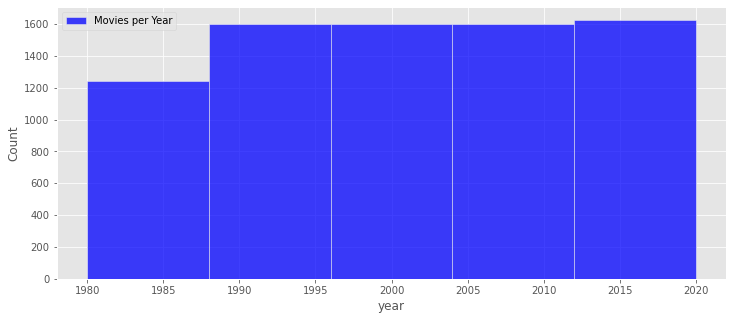

In [77]:
# How many movies  are there in the set per year?

sns.histplot(df['year'], bins = 5, color = 'blue', label = 'Movies per Year')
plt.legend()
plt.gcf().set_size_inches(12, 5)

In [78]:
# Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [79]:
# Let's see if there is any missing data
df.isnull().sum() 

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [80]:
# Let's change missing data

df['rating'] = df['rating'].fillna(0) #with 0
df['rating'] = df['rating'].fillna(df['rating'].mode()) #with value that appears most often in this column
df['gross'] = df['gross'].fillna(df['gross'].mean()) #with mean value of this column
df['budget'] = df['budget'].fillna(df['budget'].mean()) #with mean value of this column

df.isna().sum()  #checking missing data


name         0
rating       0
genre        0
year         0
released     2
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [81]:
# Chanche the data type
df = df.astype({"budget":"int64","gross":"int64"})

In [82]:
# Let's loop through the data and see the percentage of the missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [83]:
# The rows with the null values are very little. So let's drop them and check the shape of the data
df = df.dropna()
df.isnull().sum() 

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

In [84]:
# Let's check the shape of the data again
print(f'The data has {df.shape[0]} rows and {df.shape[1]} columns respectively')

The data has 7643 rows and 15 columns respectively


In [119]:
#Create correct year column

#df['yearcorrect']=df['released'].astype(str).str[:4]
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [86]:
#Seeing the oldest and newest movies in the set
#Oldest released movies:

Oldest = df.sort_values('yearcorrect', ascending = True)
Oldest[['name', 'yearcorrect']][:10]

,name,yearcorrect
0,The Shining,1980
65,Fatso,1980
64,Resurrection,1980
63,Honeysuckle Rose,1980
61,The Competition,1980
60,Herbie Goes Bananas,1980
58,The Octagon,1980
57,Oh Heavenly Dog,1980
56,When Time Ran Out...,1980
55,The Private Eyes,1980


In [87]:
#Newest released movies:

New = df.sort_values('yearcorrect', ascending = False)
New[['name', 'yearcorrect']][:10]

,name,yearcorrect
7667,Tee em el,2020
7648,Bad Boys for Life,2020
7580,Run with the Hunted,2020
7604,Mine 9,2020
7487,Portrait of a Lady on Fire,2020
7584,"Faith, Hope & Love",2020
7462,1917,2020
7525,Weathering with You,2020
7641,By Light of Desert Night,2020
7643,Tenet,2020


In [88]:
#Country names in my dataset
country_data = list(df['country'].unique()) # Countries in my dataset
country_data

['United Kingdom',
 'United States',
 'South Africa',
 'West Germany',
 'Canada',
 'Australia',
 'Libya',
 'Italy',
 'Soviet Union',
 'France',
 'Hong Kong',
 'South Korea',
 'Sweden',
 'Spain',
 'Mexico',
 'Switzerland',
 'Netherlands',
 'New Zealand',
 'Philippines',
 'Israel',
 'Japan',
 'Hungary',
 'Brazil',
 'Yugoslavia',
 'Argentina',
 'Taiwan',
 'Ireland',
 'Denmark',
 'Germany',
 'Iran',
 'China',
 'Belgium',
 'Austria',
 'Portugal',
 'Vietnam',
 'Republic of Macedonia',
 'Russia',
 'Federal Republic of Yugoslavia',
 'Greece',
 'Czech Republic',
 'Norway',
 'India',
 'Jamaica',
 'Aruba',
 'Thailand',
 'Colombia',
 'Romania',
 'United Arab Emirates',
 'Indonesia',
 'Turkey',
 'Serbia',
 'Poland',
 'Kenya',
 'Finland',
 'Iceland',
 'Chile',
 'Panama',
 'Malta',
 'Lebanon']

In [89]:
len(country_data) #How many countries do we have in our data frame?

59

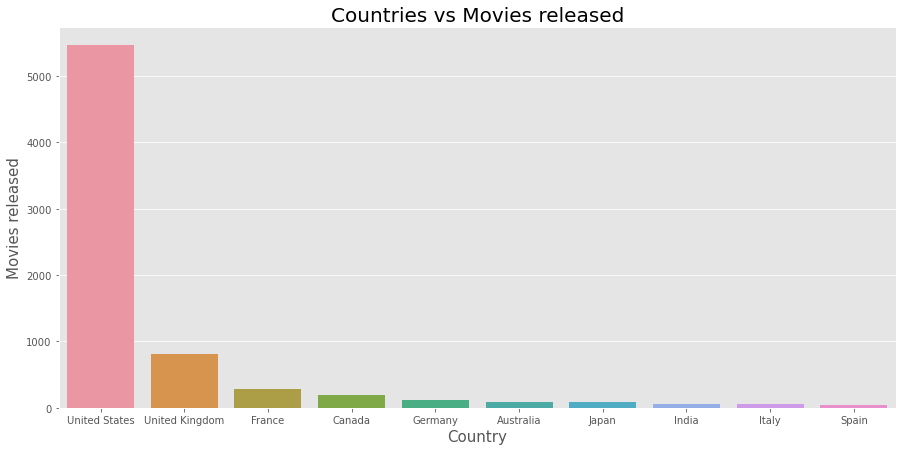

In [90]:
# Countries with the most released films

Countries = pd.DataFrame(df['country'].value_counts())
Ten_countries = pd.DataFrame(df['country'].value_counts()).head(10)

sns.barplot(x = Ten_countries.index, y = Ten_countries['country'])

labels =Ten_countries.index.tolist()
plt.gcf().set_size_inches(15, 7)

plt.title('Countries vs Movies released', fontsize = 20)
plt.xlabel('Country', fontsize = 15)
plt.ylabel('Movies released', fontsize = 15)

plt.show()

In [91]:
Per_c = Ten_countries.sum() / df.shape[0] * 100

print('%d%% all movies have been produced by top-10 countries'% (Per_c))

94% all movies have been produced by top-10 countries


In [92]:
# Company analisis
len(df.groupby('company').size()) #How many companies do we have in our data frame?


2378

In [93]:
df['company'].dtype

dtype('O')

In [94]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56569922347
Universal Pictures           52592689431
Columbia Pictures            43008941346
Paramount Pictures           40572107956
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9387231187
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [98]:
df.groupby(['company', 'yearcorrect'])[["gross"]].sum().head(30)

gross
company                              yearcorrect           
"DIA" Productions GmbH & Co. KG      2003          44350926
"Weathering With You" Film Partners  2020         193457467
.406 Production                      1997             10580
1+2 Seisaku Iinkai                   2000           1196218
10 West Studios                      2010            814906
120 Films                            2002           6479328
120dB Films                          2009             26676
                                     2017            368372
13 Productions                       2001             25461
1492 Pictures                        1996         129832389
                                     1999          87423861
1818 Productions                     1983          12232628
19 Entertainment                     2003           4928883
1978 Films                           2017          40656399
1984 Private Defense Contractors     2014          58834384
1992 Number Four Limited Partnership 1995           4686937
2 Loop Films                         2003            264349
2.0 Entertainment                    2019         122810399
2.4.7. Films                         2008          22783978
2003 Productions                     2005          69424389
20th Century Studios                 2020         111105497
21 Laps Entertainment                2014          41296320
                                     2018          41142379
21st Century Film Corporation        1989           3953745
                                     1990           7658401
21st Century Films                   1994           1702394
25th Hour Productions                2003          23932055
26 Films                             2009          20458873
2929 Productions                     2008          14007547
                                     2009          21946121

In [102]:
# Companies with the most released movies

Ten_comp = pd.DataFrame(df['company'].value_counts()).head(10)
Ten_comp

,company
Universal Pictures,377
Warner Bros.,334
Columbia Pictures,332
Paramount Pictures,320
Twentieth Century Fox,240
New Line Cinema,174
Touchstone Pictures,132
Metro-Goldwyn-Mayer (MGM),125
Walt Disney Pictures,123
TriStar Pictures,94


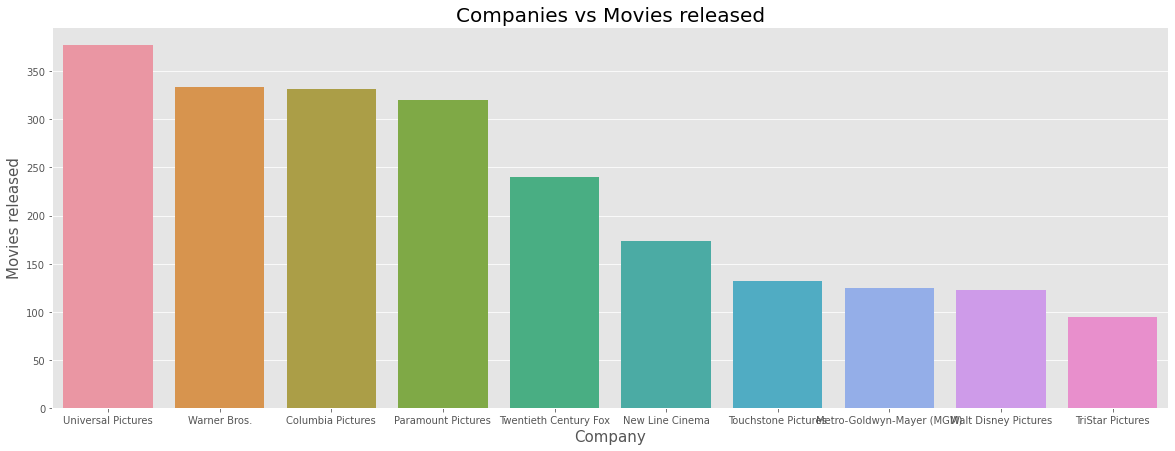

In [103]:
# Companies with the most released movies

sns.barplot(x = Ten_comp.index, y = Ten_comp['company'])

labels =Ten_comp.index.tolist()
plt.gcf().set_size_inches(20, 7)

plt.title('Companies vs Movies released', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Movies released', fontsize = 15)

plt.show()

In [104]:
Per_comp = Ten_comp.sum() / df.shape[0] * 100

print ('The 10 biggest companies around the world have produced %d%% of all the movies released within those 30 years'% (Per_comp))

The 10 biggest companies around the world have produced 29% of all the movies released within those 30 years


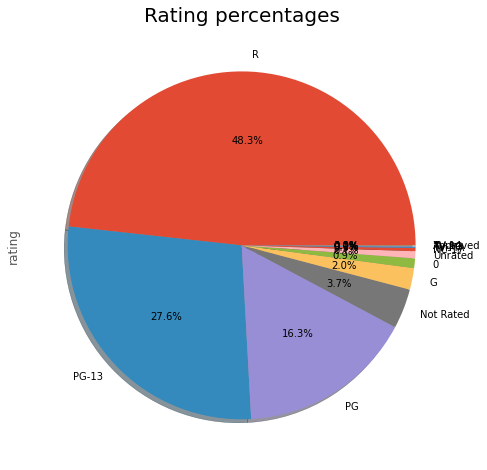

In [105]:
# Let's see the rating breakdown

df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title('Rating percentages', fontsize = 20)
#plt.tight_layout()
plt.show()

In [106]:
Top_genre = pd.DataFrame(df['genre'].value_counts()).head(10)
Top_genre

,genre
Comedy,2242
Action,1700
Drama,1506
Crime,550
Biography,442
Adventure,427
Animation,337
Horror,321
Fantasy,44
Mystery,20


In [107]:
df2=df.groupby('genre').rating.value_counts()
df2

genre      rating   
Action     R            841
           PG-13        622
           PG           180
           Not Rated     49
           0              5
           G              1
           TV-14          1
           TV-MA          1
Adventure  PG           205
           R            102
           PG-13         91
           G             21
           Not Rated      5
           0              1
           Approved       1
           TV-MA          1
Animation  PG           185
           G            100
           PG-13         23
           R             13
           Not Rated     10
           0              3
           TV-MA          2
           TV-PG          1
Biography  R            223
           PG-13        135
           PG            64
           Not Rated     12
           0              3
           Unrated        2
           G              1
           NC-17          1
           TV-MA          1
Comedy     R            983
           PG-13        737

In [108]:
d_pivot=df.groupby('genre').rating.value_counts().reset_index(name='counts')
d_pivot

,genre,rating,counts
0,Action,R,841
1,Action,PG-13,622
2,Action,PG,180
3,Action,Not Rated,49
4,Action,0,5
5,Action,G,1
6,Action,TV-14,1
7,Action,TV-MA,1
8,Adventure,PG,205
9,Adventure,R,102


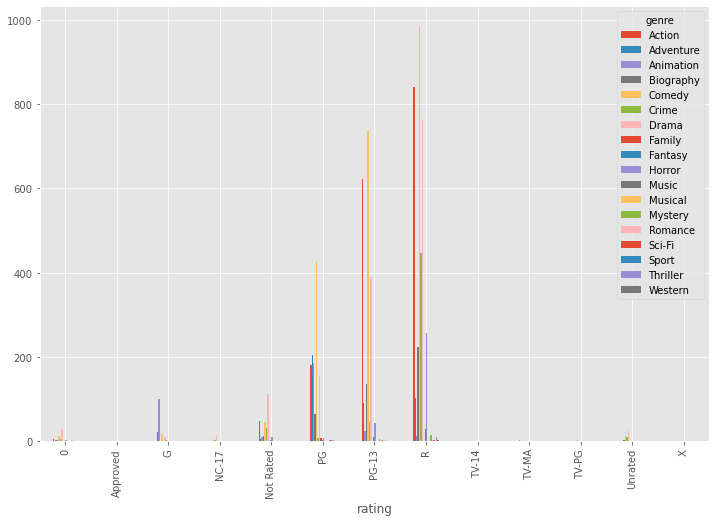

In [109]:
df.groupby('rating').genre.value_counts().unstack().plot(kind='bar')
plt.show()

In [110]:
#Conclusion:

#We can see that most of the movies are R,PG-13  and PG-rated, and that most movies are from Comedy, Action and Drama genres.


In [111]:
#Actors and directors
#Let's use  wordclouds to see what happens at the Star and Director columns

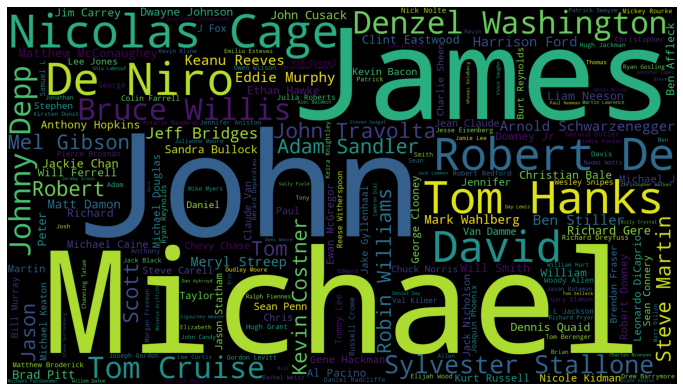

In [112]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.star))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

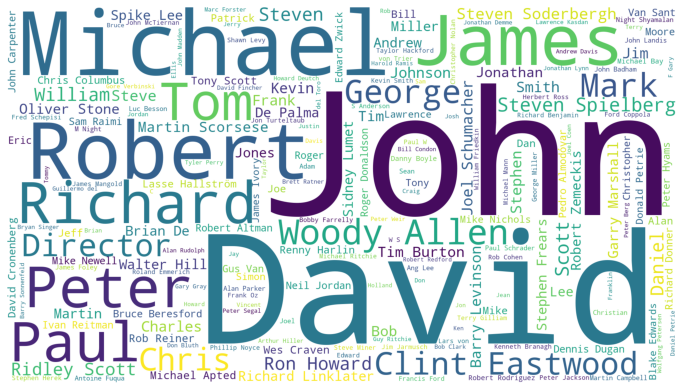

In [113]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='White',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [114]:
df.shape

(7643, 16)

In [115]:
# Numerical features description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7643.0,2.000400e+03,1.113482e+01,1980.0,1991.0,2000.0,2010.0,2.020000e+03
score,7643.0,6.392045e+00,9.681635e-01,1.9,5.8,6.5,7.1,9.300000e+00
votes,7643.0,8.832621e+04,1.635009e+05,7.0,9200.0,33000.0,94000.0,2.400000e+06
budget,7643.0,3.563426e+07,3.513557e+07,3000.0,14000000.0,35589876.0,35589876.0,3.560000e+08
gross,7643.0,7.861166e+07,1.638969e+08,309.0,4728876.5,21413105.0,78500541.0,2.847246e+09
runtime,7643.0,1.072915e+02,1.857487e+01,63.0,95.0,104.0,116.0,3.660000e+02
yearcorrect,7643.0,2.000621e+03,1.114412e+01,1980.0,1991.0,2001.0,2010.0,2.020000e+03


In [116]:
# Statistical insights for non-numeric features
df.describe(exclude = "number").T

,count,unique,top,freq
name,7643,7488,Anna,3
rating,7643,13,R,3689
genre,7643,18,Comedy,2242
released,7643,3404,"February 14, 1986 (United States)",9
director,7643,2935,Woody Allen,38
writer,7643,4519,Woody Allen,37
star,7643,2803,Nicolas Cage,43
country,7643,59,United States,5460
company,7643,2378,Universal Pictures,377


In [117]:
df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
yearcorrect      int32
dtype: object

In [120]:
# Let's sort our data
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [121]:
pd.set_option('display.max_rows', None)

<AxesSubplot:>

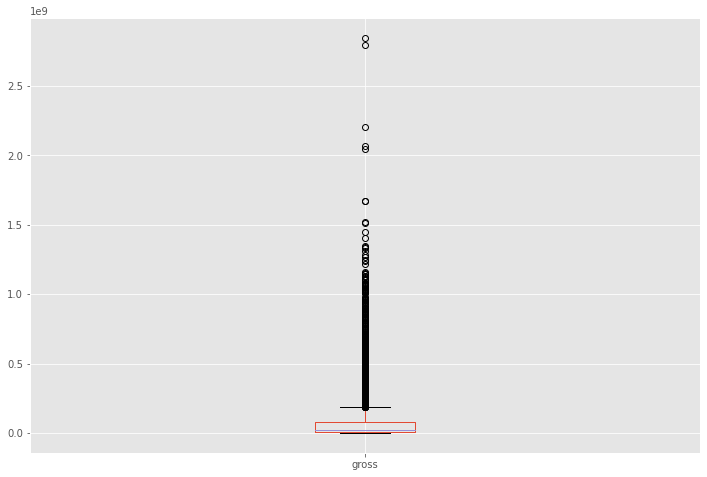

In [122]:
# Are there any Outliers?

df.boxplot(column=['gross'])

In [123]:
# Let's check if there are any duplicates in dataframe
df.duplicated().sum()

0

In [124]:
df['company'].nunique()

2378

In [144]:
#df.drop_duplicates()



In [126]:
# Hypothesises:
# 1. Budgets on the movies affect the revenue generated from the movies: the more budget results the more gross earnings
# 2. Company affects the the revenue generated from the movies: the more famouse or big company is the more gross earnings are

<function matplotlib.pyplot.show(close=None, block=None)>

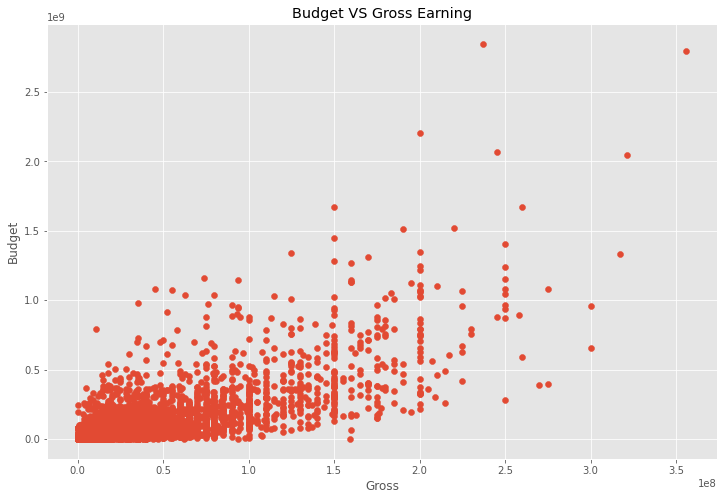

In [127]:
#Scatter plot with Budget vs Gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget VS Gross Earning')
plt.xlabel('Gross')
plt.ylabel ('Budget')
plt.show

In [128]:
# Let's start looking at correlation

df.corr(method='pearson')#pearson(default), kendall, spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.098278,0.223353,0.267264,0.252438,0.119789,0.997401
score,0.098278,1.000000,0.409432,0.064169,0.182866,0.399965,0.106108
votes,0.223353,0.409432,1.000000,0.420949,0.628744,0.308907,0.218802
budget,0.267264,0.064169,0.420949,1.000000,0.711729,0.265121,0.261171
gross,0.252438,0.182866,0.628744,0.711729,1.000000,0.241296,0.245795
runtime,0.119789,0.399965,0.308907,0.265121,0.241296,1.000000,0.119595
yearcorrect,0.997401,0.106108,0.218802,0.261171,0.245795,0.119595,1.000000


In [129]:
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.067493,0.332174,0.145656,0.182172,0.096457,0.987609
score,0.067493,1.000000,0.300137,0.003378,0.080309,0.283436,0.073133
votes,0.332174,0.300137,1.000000,0.161454,0.508996,0.197038,0.326535
budget,0.145656,0.003378,0.161454,1.000000,0.260203,0.161941,0.142553
gross,0.182172,0.080309,0.508996,0.260203,1.000000,0.155640,0.173514
runtime,0.096457,0.283436,0.197038,0.161941,0.155640,1.000000,0.096264
yearcorrect,0.987609,0.073133,0.326535,0.142553,0.173514,0.096264,1.000000


In [130]:
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.098835,0.471276,0.204703,0.266681,0.141981,0.997392
score,0.098835,1.000000,0.428206,0.004518,0.117908,0.399672,0.107175
votes,0.471276,0.428206,1.000000,0.234772,0.690218,0.288562,0.464219
budget,0.204703,0.004518,0.234772,1.000000,0.363947,0.228232,0.200172
gross,0.266681,0.117908,0.690218,0.363947,1.000000,0.227301,0.253904
runtime,0.141981,0.399672,0.288562,0.228232,0.227301,1.000000,0.141908
yearcorrect,0.997392,0.107175,0.464219,0.200172,0.253904,0.141908,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

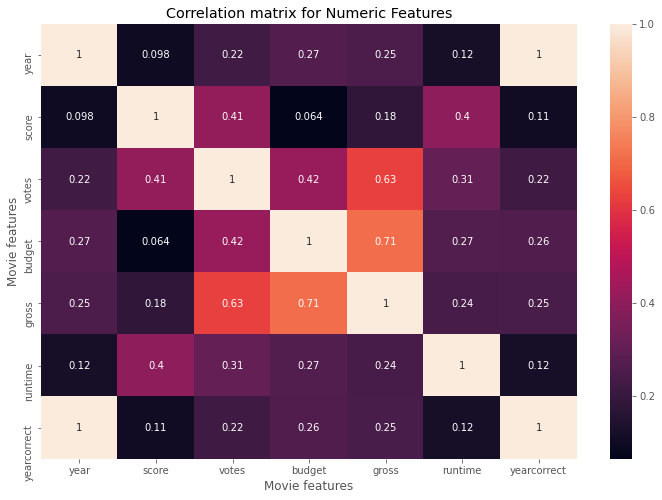

In [131]:
correlation_matrix=df.corr(method='pearson')
sns.heatmap (correlation_matrix, annot=True)
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show

In [132]:
#There are clear correlation between Budget and Gross, and also a relationship between the Vote and Gross variables 
#High correlation betwenn Budget and Gross - the first hypothesis was correct

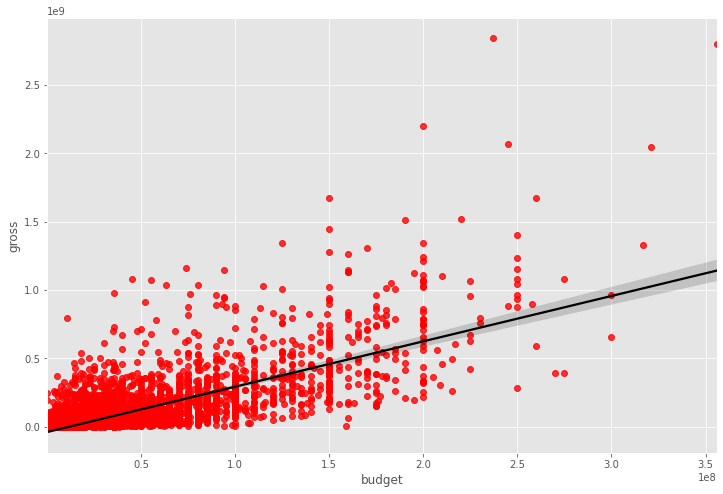

In [133]:
# Plot Budget vs Gross, Using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'black'})
plt.show()

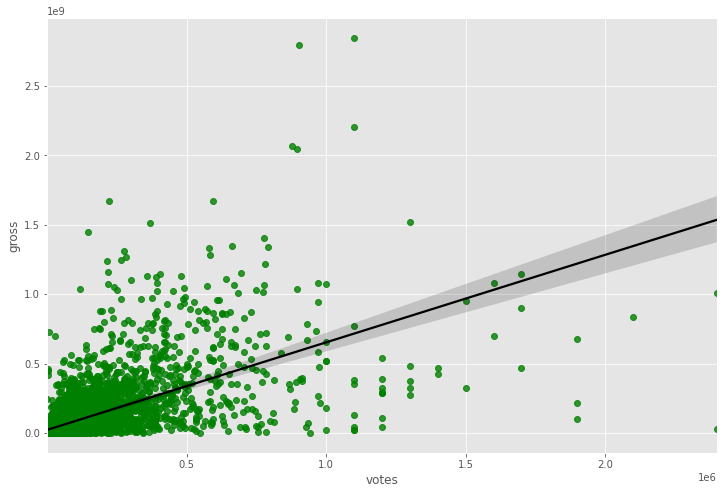

In [134]:
# Plot  Votes vs Gross, Using Seaborn
sns.regplot(x='votes', y='gross', data=df, scatter_kws={'color':'green'}, line_kws={'color':'black'})
plt.show()

In [135]:
# Conclusion:

# Low budget movies and low voted movies all seem to have poor profit
# As the budget raises, there is a tendency for gross improvement
# There is no clear relationship between how much a movie profits from the number of votes it has

In [136]:
# Let's assign a random numeric value for each unique categorical value

df_numerized=df
for col_name in df_numerized. columns:
    if (df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]=df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,532,6,0,2009,693,7.8,1100000.0,1153,1774,2324,55,237000000,2847246203,2246,162.0,2009
7445,534,6,0,2019,181,8.4,903000.0,162,739,2231,55,356000000,2797501328,1599,181.0,2019
3045,6873,6,6,1997,701,7.8,1100000.0,1153,1774,1587,55,200000000,2201647264,2246,194.0,1997
6663,5128,6,0,2015,695,7.8,876000.0,1123,2541,520,55,245000000,2069521700,1533,138.0,2015
7244,535,6,0,2018,190,8.4,897000.0,162,739,2231,55,321000000,2048359754,1599,149.0,2018


<ipython-input-139-effb799622ce>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation_matrix.corr(), dtype=np.bool))


<function matplotlib.pyplot.show(close=None, block=None)>

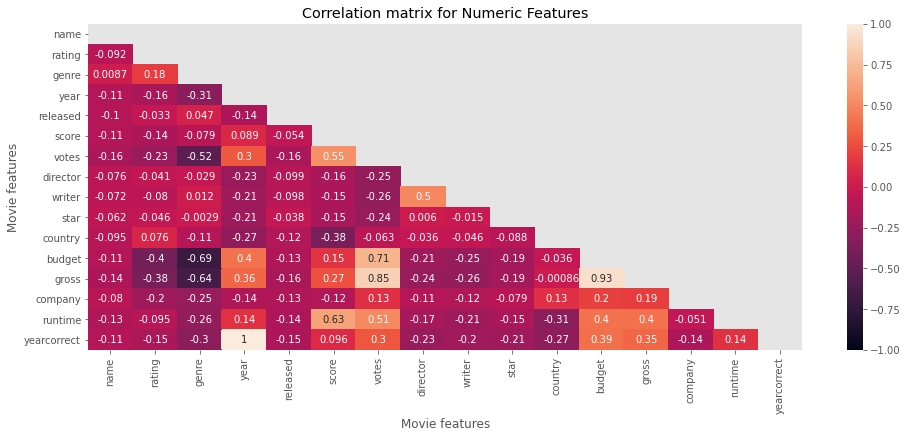

In [139]:
# Let's use mask method to get rid of unnecessary data

plt.figure(figsize=(16, 6)) 
correlation_matrix=df_numerized.corr(method='pearson')

mask = np.triu(np.ones_like(correlation_matrix.corr(), dtype=np.bool)) 
heatmap = sns.heatmap(correlation_matrix.corr(), mask=mask, vmin=-1, vmax=1, annot=True) 
plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show

In [140]:
correlation_mat=df_numerized.corr()
corr_pair=correlation_mat.unstack()
corr_pair

name         name           1.000000
             rating        -0.006483
             genre          0.015231
             year           0.011931
             released      -0.010470
             score          0.016603
             votes          0.013239
             director       0.008970
             writer         0.009833
             star           0.006140
             country       -0.011042
             budget         0.020791
             gross          0.005516
             company        0.010557
             runtime        0.010673
             yearcorrect    0.011333
rating       name          -0.006483
             rating         1.000000
             genre          0.075065
             year           0.012400
             released       0.019913
             score         -0.003132
             votes          0.032286
             director       0.022065
             writer        -0.004763
             star           0.009854
             country        0.081817
 

In [142]:
sorted_pair=corr_pair.sort_values(ascending=True)
high_corr=sorted_pair[(sorted_pair)>0.5]
high_corr

gross        votes          0.628744
votes        gross          0.628744
budget       gross          0.711729
gross        budget         0.711729
year         yearcorrect    0.997401
yearcorrect  year           0.997401
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes ans Budget have the highest correlation to gross earnings
# Company has low correlation: my secong hypothesis was wrong